In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 150
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('muted')

# Check out 
# https://seaborn.pydata.org/tutorial/color_palettes.html#palette-tutorial
# to understand how to choose a color palette

In [ ]:
# notion of stratification!

<img title="Penguins in Basel" alt="Penguins in Basel" src="https://www.zoobasel.ch/uploads/images/news/fotos/eselspinguin_0854992.jpg">

Foto ©Zoo Basel

In [3]:
penguins = sns.load_dataset('penguins')
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


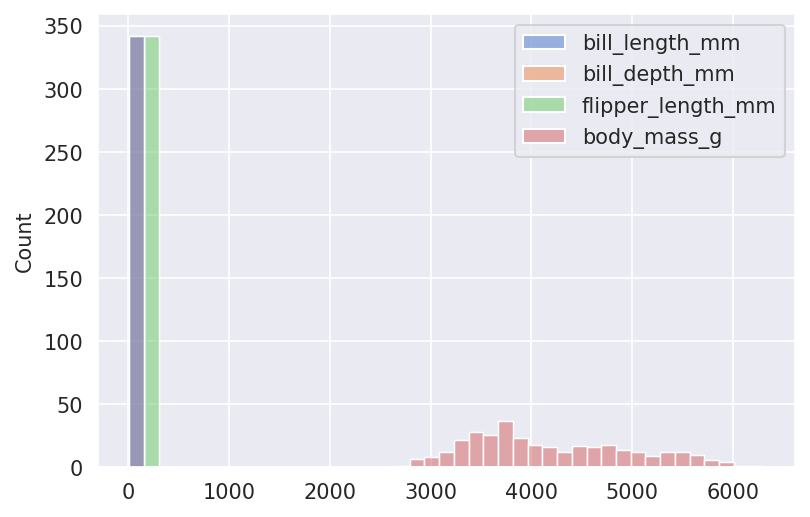

In [4]:
# - seaborn works directly with dataframes
# - histplot is an axes-level function (it takes ax as optional argument!)
#   and it returns an Axes object

# let's explore the distribution of penguin "parameters"
ax = sns.histplot(data=penguins)

<AxesSubplot:xlabel='flipper_length_mm', ylabel='Count'>

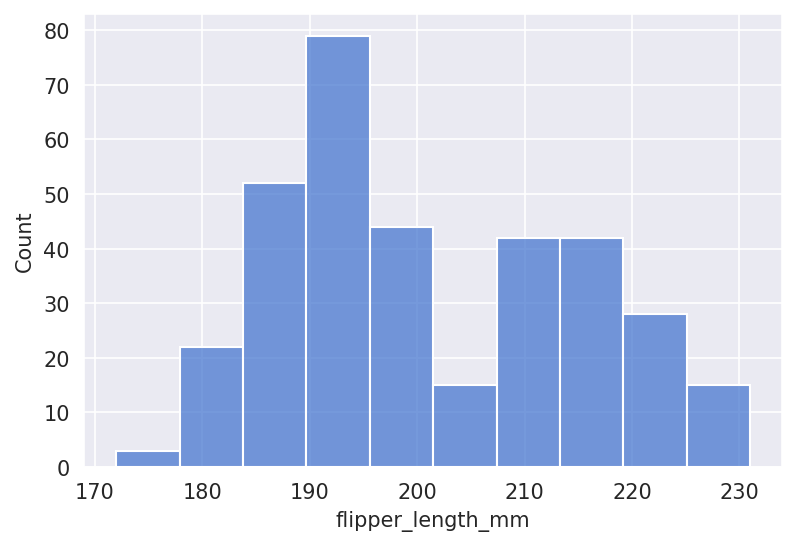

In [5]:
sns.histplot(data=penguins, x="flipper_length_mm")

In [6]:
penguins.species.unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

<AxesSubplot:xlabel='flipper_length_mm', ylabel='Count'>

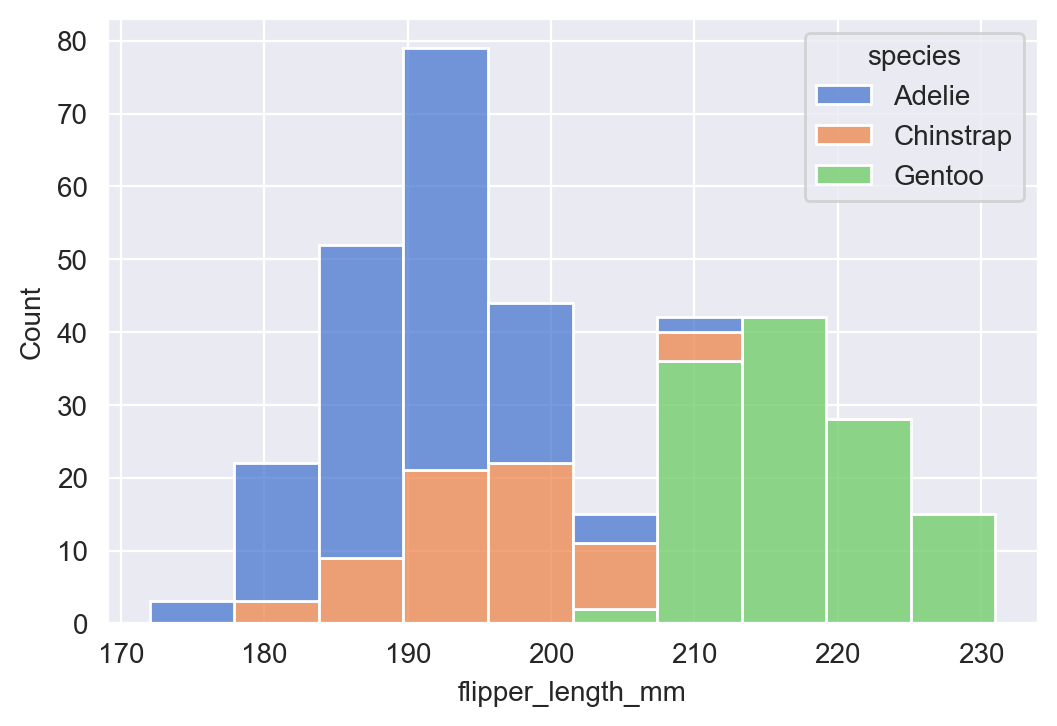

In [11]:
# the above plot blends all penguin species together; are there
# significant differences between them?

sns.histplot(data=penguins, 
             x="flipper_length_mm", 
             hue="species",
             multiple="stack"
            )

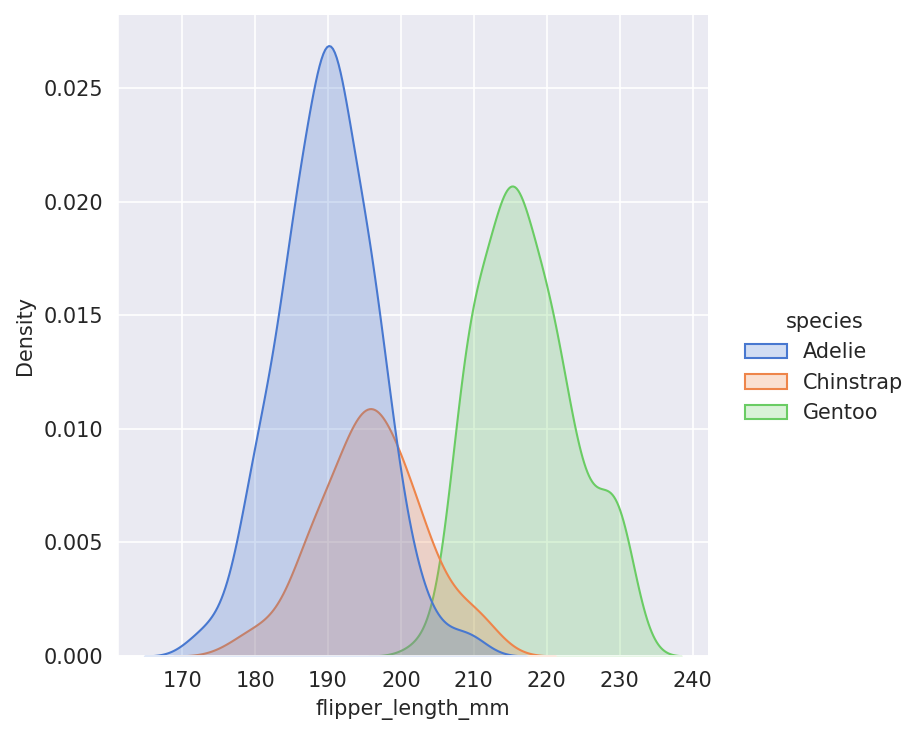

In [7]:
# using a figure-level function 

sns.displot(data=penguins,
            x="flipper_length_mm",
            hue="species",
            kind="kde",
            fill=True
           )

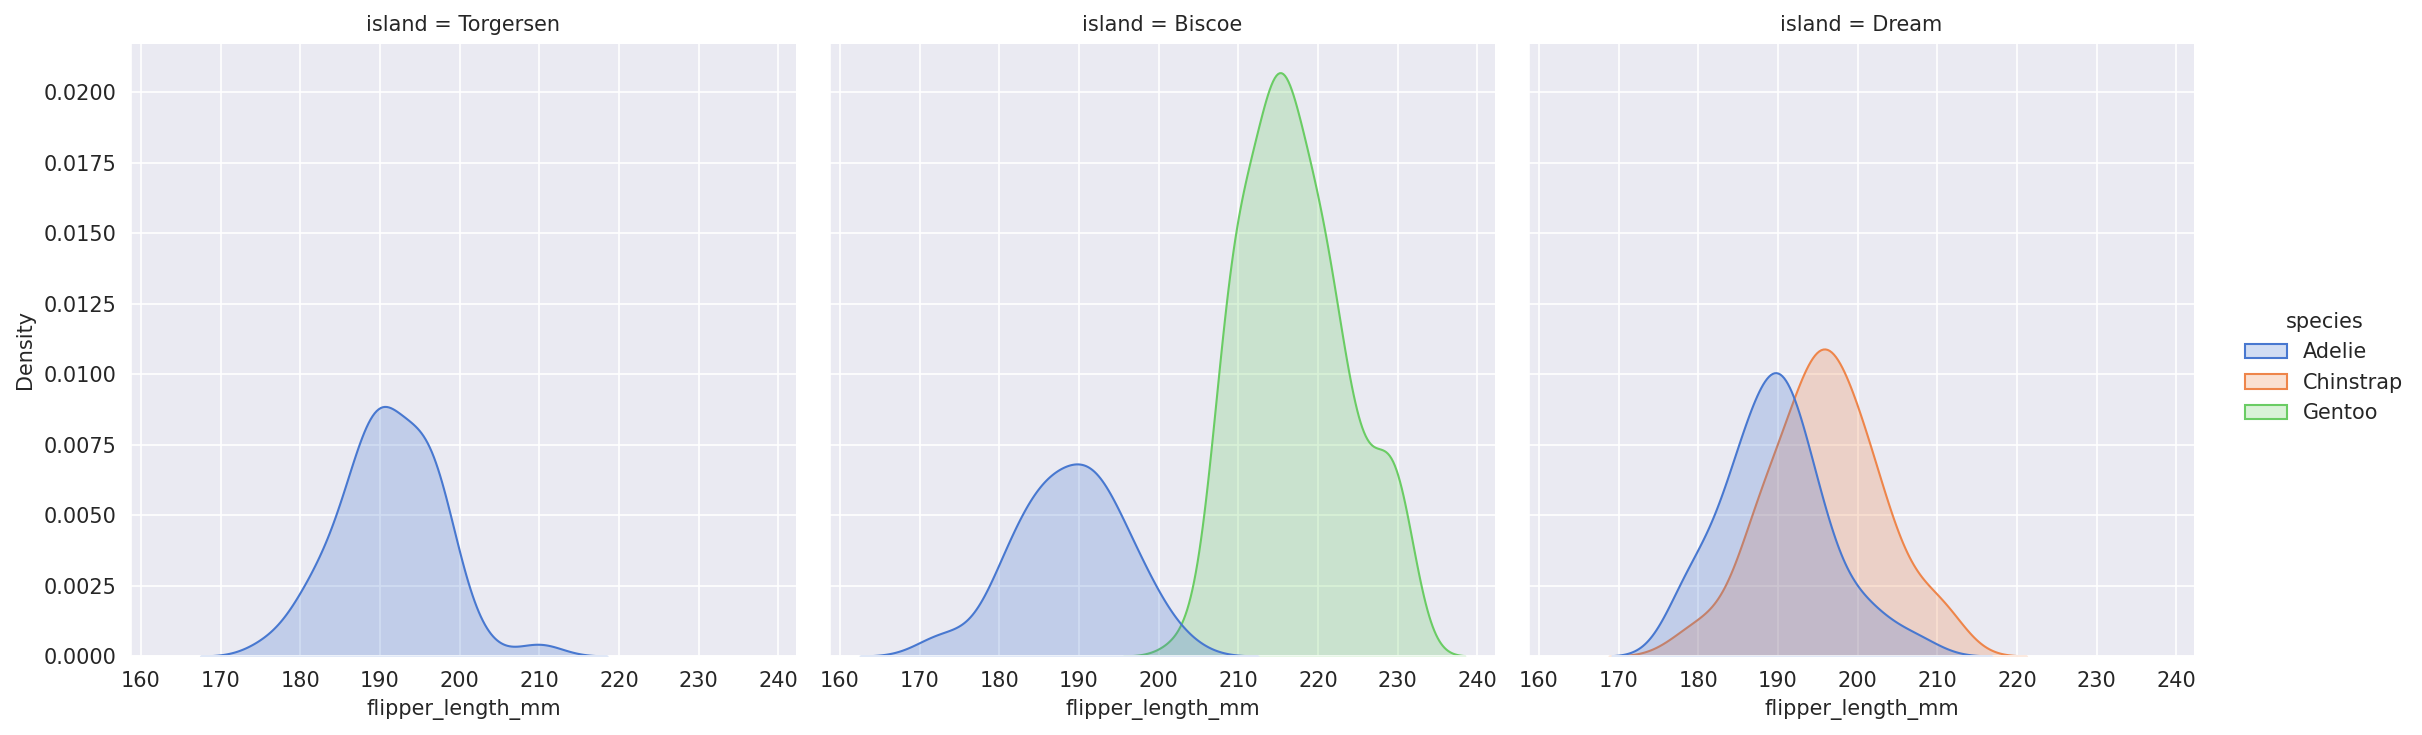

In [8]:
# add a column; a great thing about figure-level functions

sns.displot(data=penguins,
            x="flipper_length_mm",
            hue="species",
            col="island",
            kind="kde",
            fill=True
           )

<AxesSubplot:xlabel='flipper_length_mm', ylabel='bill_length_mm'>

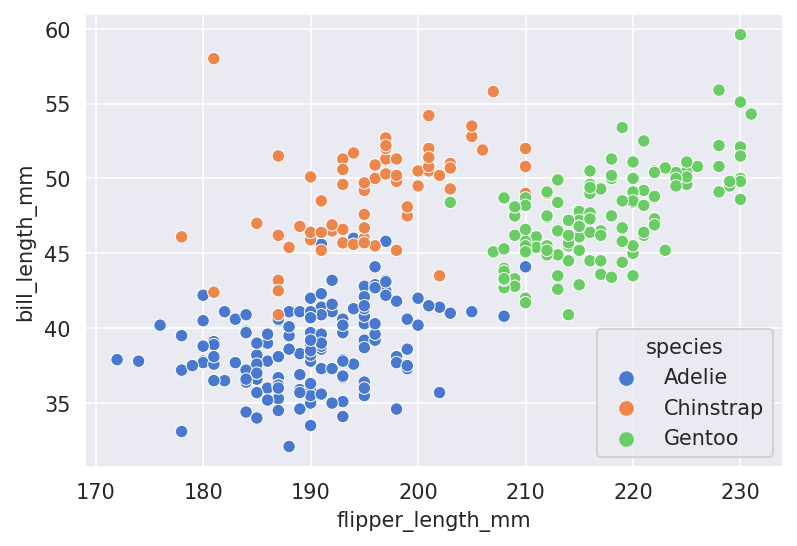

In [9]:
# a bit more (relational) plotting with axes vs figure-level
# functions

sns.scatterplot(data=penguins, 
                x="flipper_length_mm", 
                y="bill_length_mm",
                hue="species"
               )

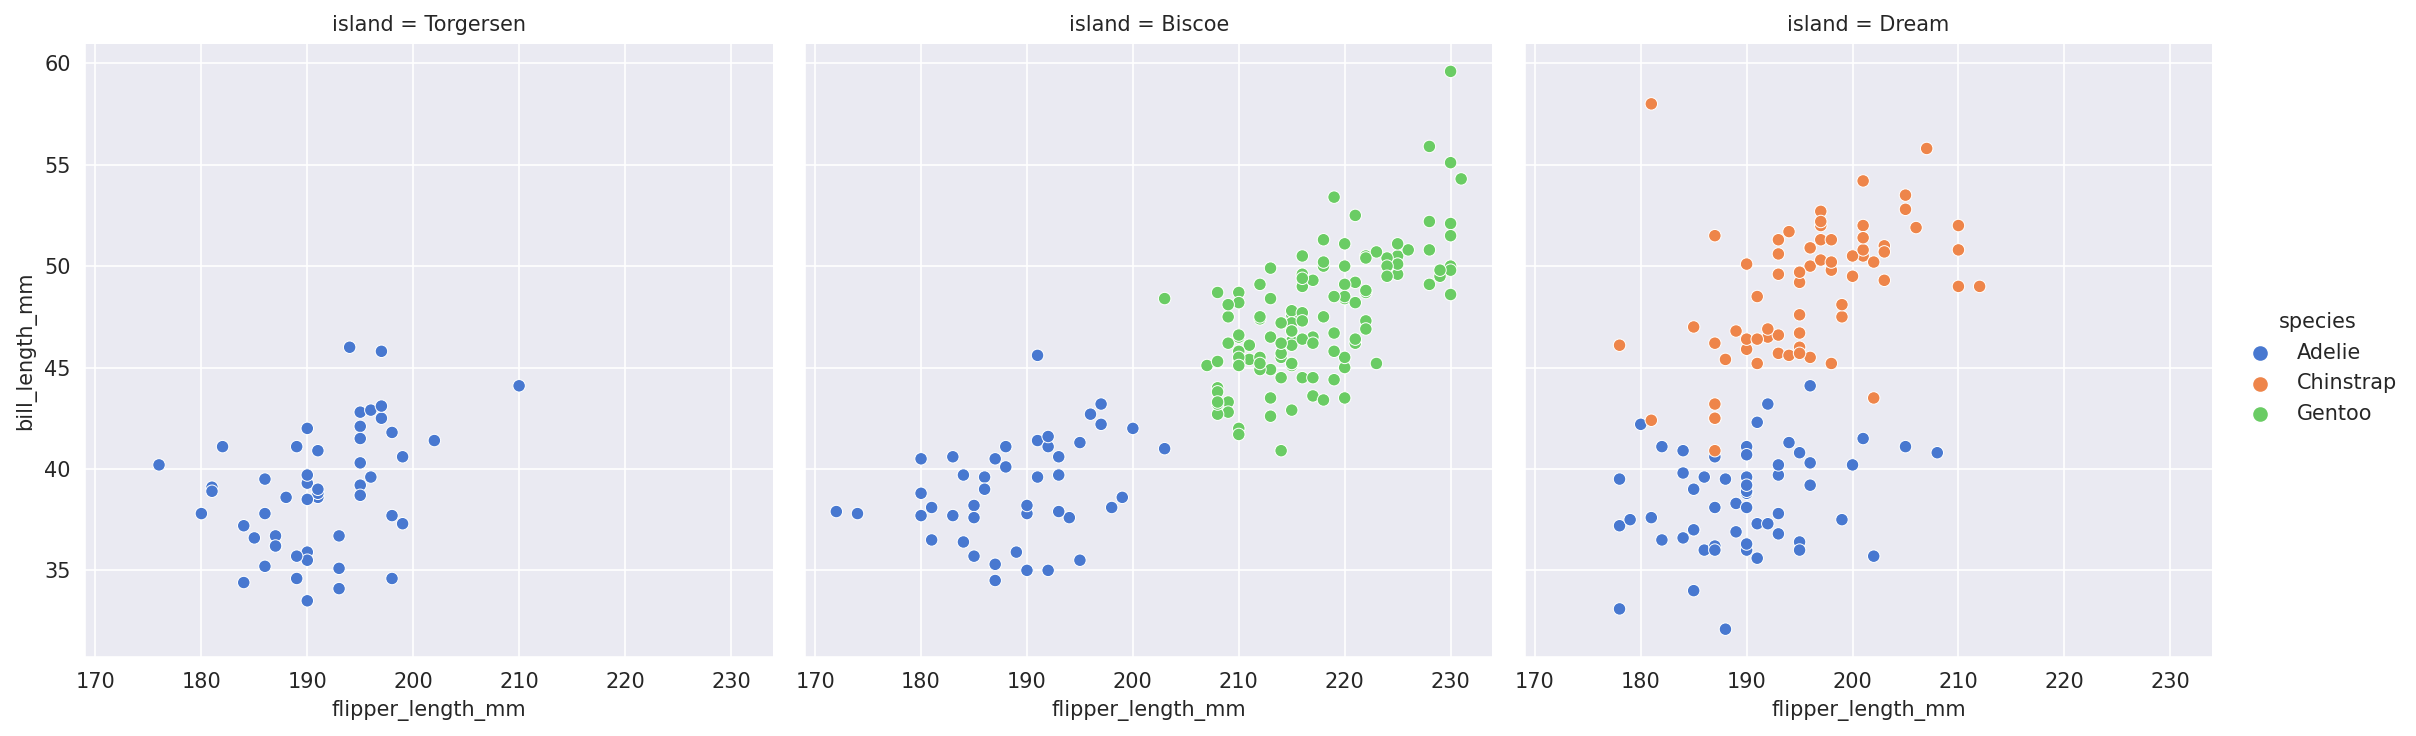

In [10]:
# again, easy stratification via figure-level functions

sns.relplot(data=penguins, 
                x="flipper_length_mm", 
                y="bill_length_mm",
                hue="species",
                col="island",
                kind="scatter"
               )

In [11]:
# a gapminder example; who is Hans Rosling? (slides, wikipedia)

gm = pd.read_csv("../data/gapminder.csv")
gm

,Unnamed: 0,country,year,pop,continent,lifeExp,gdpPercap
0,0,Afghanistan,1952,8425333.0,Asia,28.801,779.445314
1,1,Afghanistan,1957,9240934.0,Asia,30.332,820.853030
2,2,Afghanistan,1962,10267083.0,Asia,31.997,853.100710
3,3,Afghanistan,1967,11537966.0,Asia,34.020,836.197138
4,4,Afghanistan,1972,13079460.0,Asia,36.088,739.981106
...,...,...,...,...,...,...,...
1699,1699,Zimbabwe,1987,9216418.0,Africa,62.351,706.157306
1700,1700,Zimbabwe,1992,10704340.0,Africa,60.377,693.420786
1701,1701,Zimbabwe,1997,11404948.0,Africa,46.809,792.449960
1702,1702,Zimbabwe,2002,11926563.0,Africa,39.989,672.038623


<AxesSubplot:xlabel='gdpPercap', ylabel='lifeExp'>

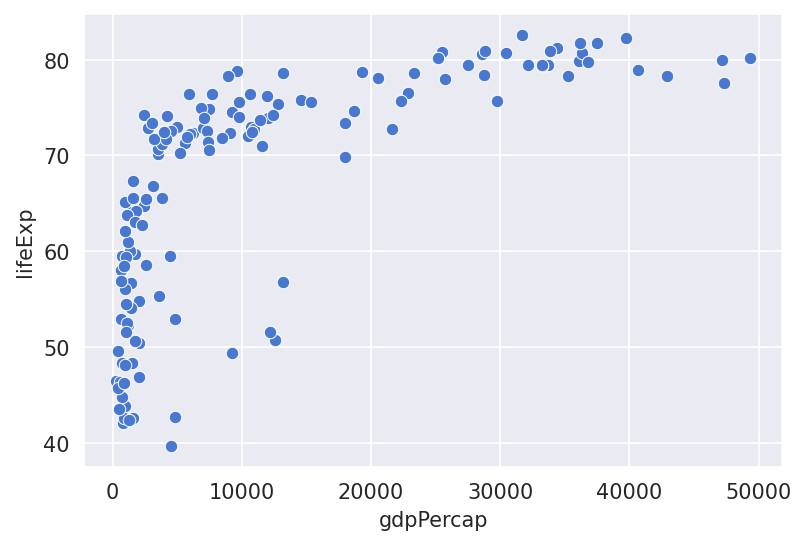

In [12]:
# a gapminder example; do it peacemeal

# extract 2007 data for visualization
gm07 = gm.loc[gm.year == 2007]

sns.scatterplot(data=gm07,
                x="gdpPercap", 
                y="lifeExp")

<AxesSubplot:xlabel='gdpPercap', ylabel='lifeExp'>

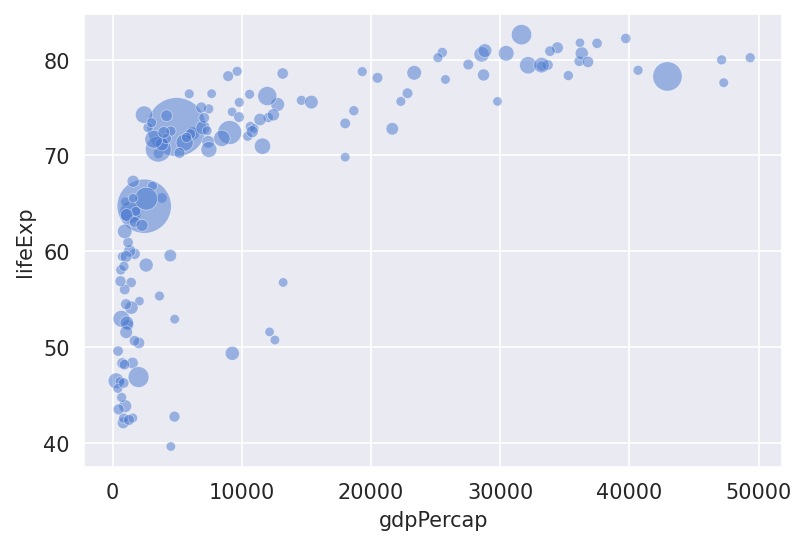

In [13]:
# 1. make bubble size proportional to population
# 2. scale bubbles so that everything looks nice
# 3. make bubbles transparent
# 4. remove the ugly legend

sns.scatterplot(data=gm07, 
                x="gdpPercap", 
                y="lifeExp",
                size="pop",
                sizes=(20, 800),
                alpha=0.5,
                legend=False
)


<AxesSubplot:xlabel='gdpPercap', ylabel='lifeExp'>

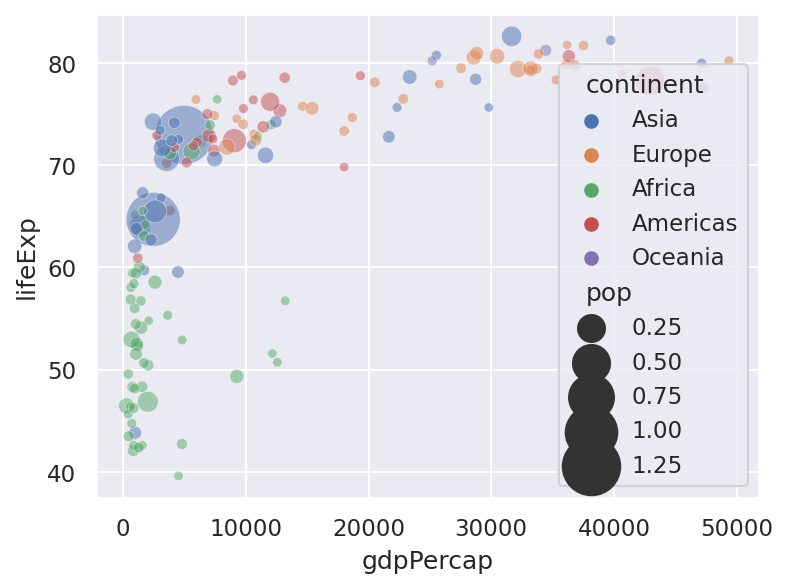

In [14]:
# a gapminder example; do it peacemeal
gm07 = gm.loc[gm.year == 2007]
sns.set(rc={'figure.figsize':(5.7,4.27)})
sns.scatterplot(data=gm07, 
                x="gdpPercap", 
                y="lifeExp",
                alpha=0.5,
                size="pop",
                legend=True,
                sizes=(20, 800),
                hue="continent"
)



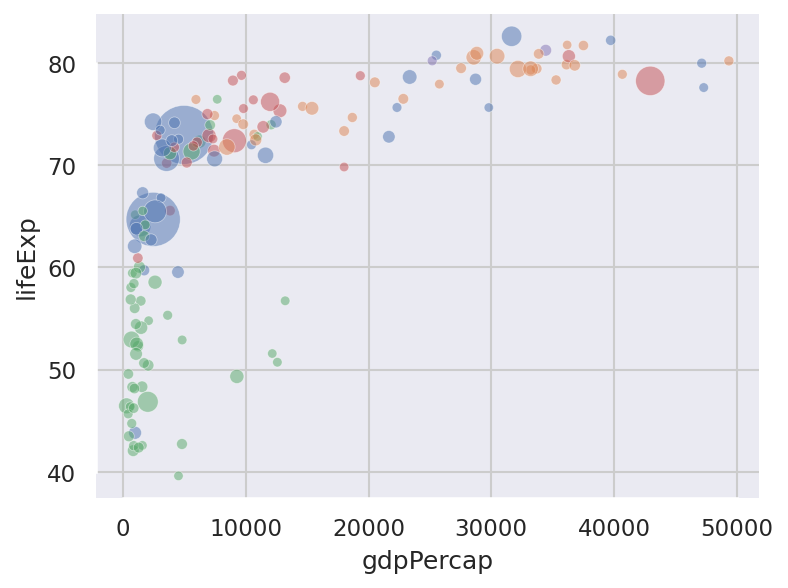

In [15]:
# a gapminder example

gm07 = gm.loc[gm.year == 2007]
sns.scatterplot(data=gm07, 
                x="gdpPercap", 
                y="lifeExp", 
                size="pop", 
                legend=False, 
                alpha=0.5,
                hue="continent",
                sizes=(20, 800))
sns.set_style("white")
sns.despine(offset=0, trim=True) # can move to arguments...

In [16]:
gm.loc[gm.year <= 1960].sort_values(by="gdpPercap")

,Unnamed: 0,country,year,pop,continent,lifeExp,gdpPercap
876,876,Lesotho,1952,748747.0,Africa,42.138,298.846212
624,624,Guinea-Bissau,1952,580653.0,Africa,32.500,299.850319
492,492,Eritrea,1952,1438760.0,Africa,35.928,328.940557
1044,1044,Myanmar,1952,20092996.0,Asia,36.319,331.000000
877,877,Lesotho,1957,813338.0,Africa,45.047,335.997115
...,...,...,...,...,...,...,...
1476,1476,Switzerland,1952,4815000.0,Europe,69.620,14734.232750
1609,1609,United States,1957,171984000.0,Americas,69.490,14847.127120
1477,1477,Switzerland,1957,5126000.0,Europe,70.560,17909.489730
852,852,Kuwait,1952,160000.0,Asia,55.565,108382.352900


In [17]:
def annotate(data, **kws):
    big = data.loc[data["pop"] > 1e8]
    n = len(big)
    ax = plt.gca()
    for i in range(n):
        ax.text(big.iloc[i].gdpPercap, big.iloc[i].lifeExp, big.iloc[i].country)

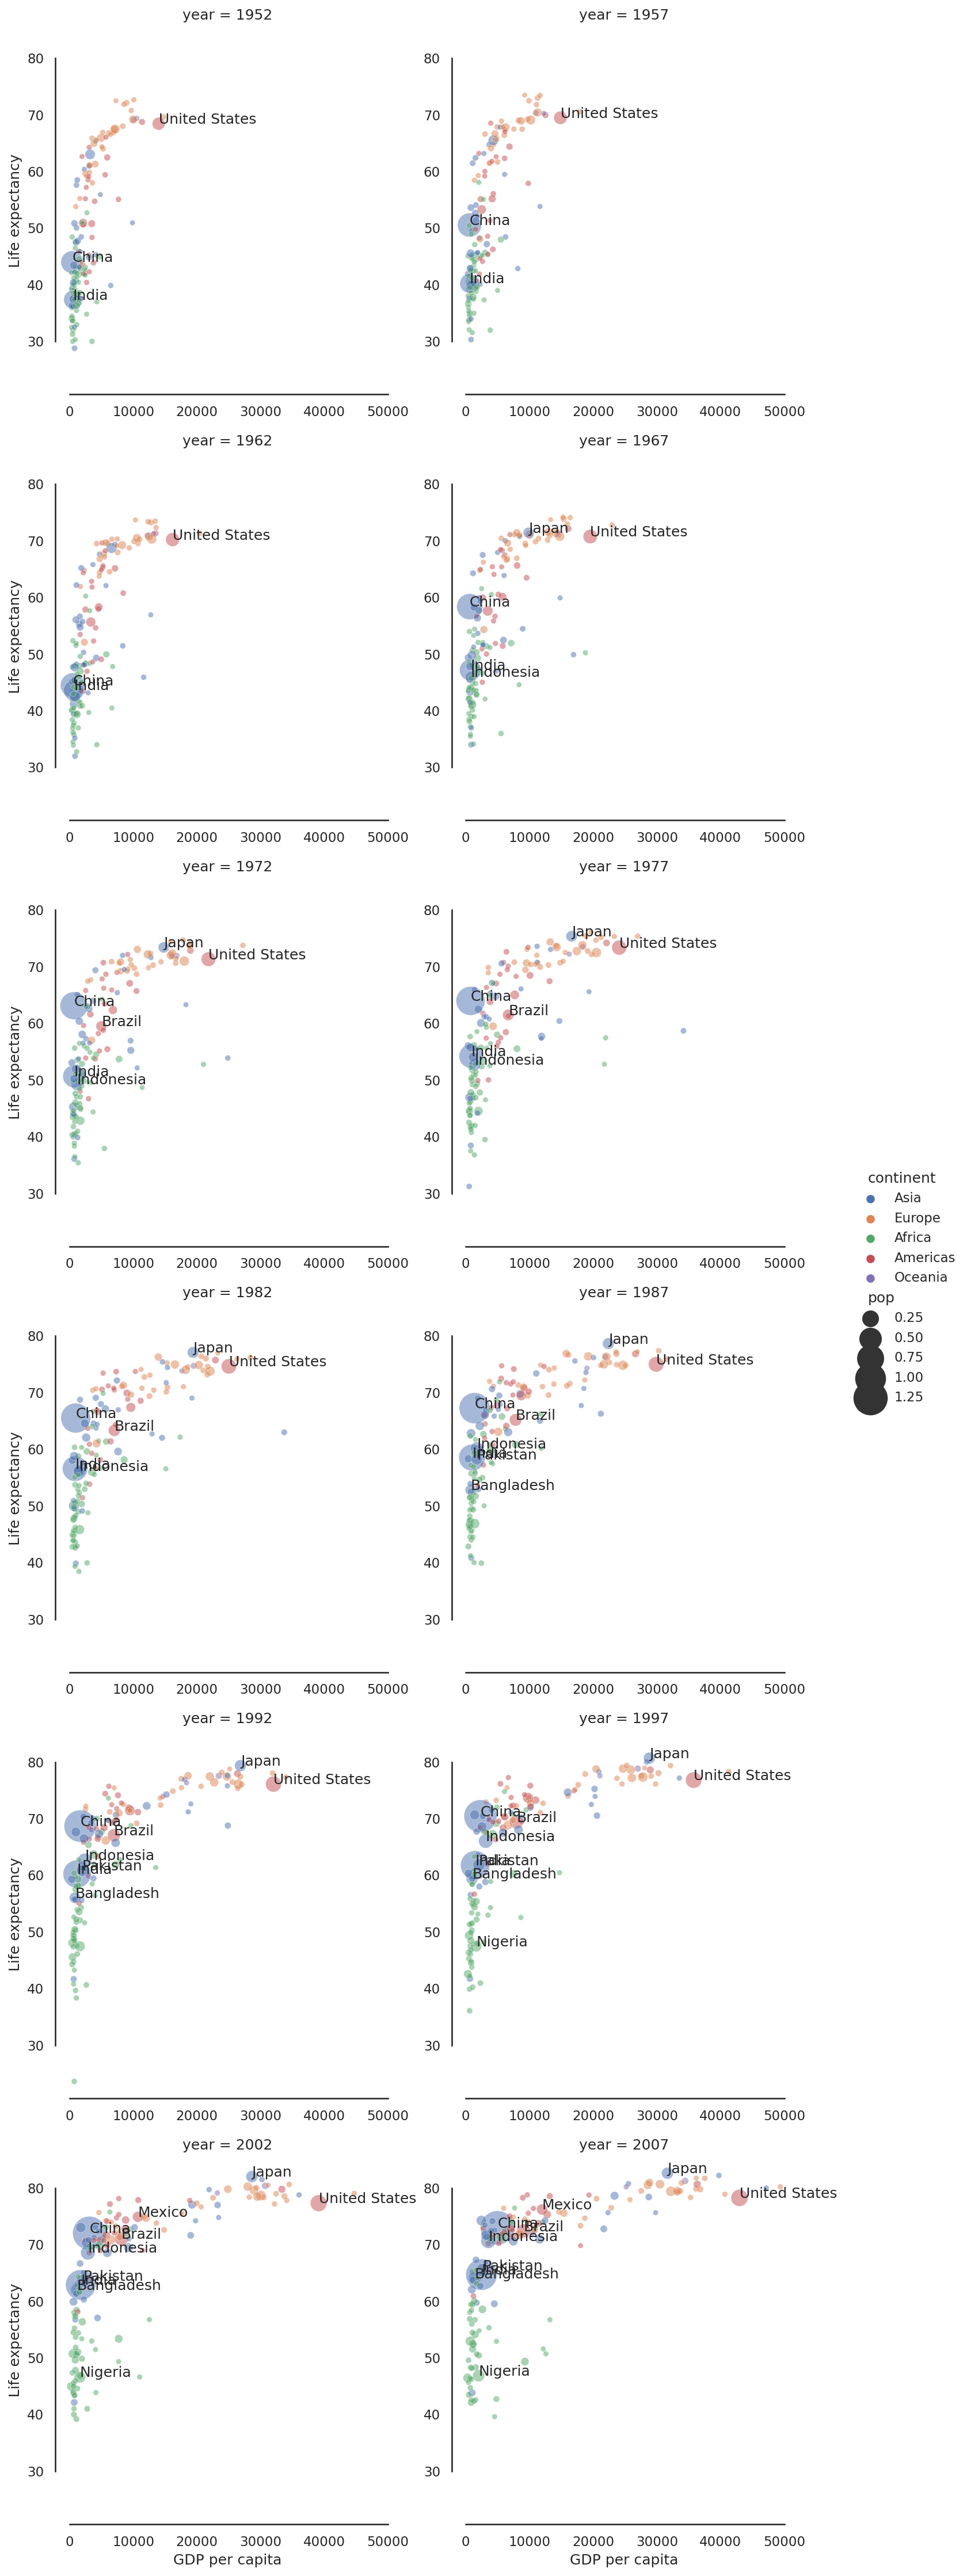

In [18]:
# a gapminder example

gm_sel = gm.loc[gm.country != "Kuwait"]

fg = sns.relplot(data=gm_sel, 
                 x="gdpPercap", 
                 y="lifeExp", 
                 size="pop", 
                 legend=True, 
                 alpha=0.5,
                 hue="continent",
                 col="year",
                 col_wrap=2,
                 kind="scatter",
                 sizes=(20, 800))
sns.set_style("white")
sns.despine(offset=0, trim=True)
fg.set_axis_labels("GDP per capita", "Life expectancy")
fg.set_titles("")
fg.map_dataframe(annotate)

# Visualizing data distributions

In [19]:
# load some stars to make a point
# (much of code by Roberto Izquierdo)

df = pd.read_csv("../data/hygdata_v3.csv")
df = df.dropna() # drops 1882 rows
df

,Unnamed: 0,Unnamed: 0.1,absmag,ci
0,0,0,4.850,0.656
1,1,1,2.390,0.482
2,2,2,5.866,0.999
3,3,3,-1.619,-0.019
4,4,4,2.421,0.370
...,...,...,...,...
117727,117727,119603,11.177,1.500
117728,117728,119607,11.010,1.540
117729,117729,119610,14.984,1.870
117730,117730,119611,11.482,1.640


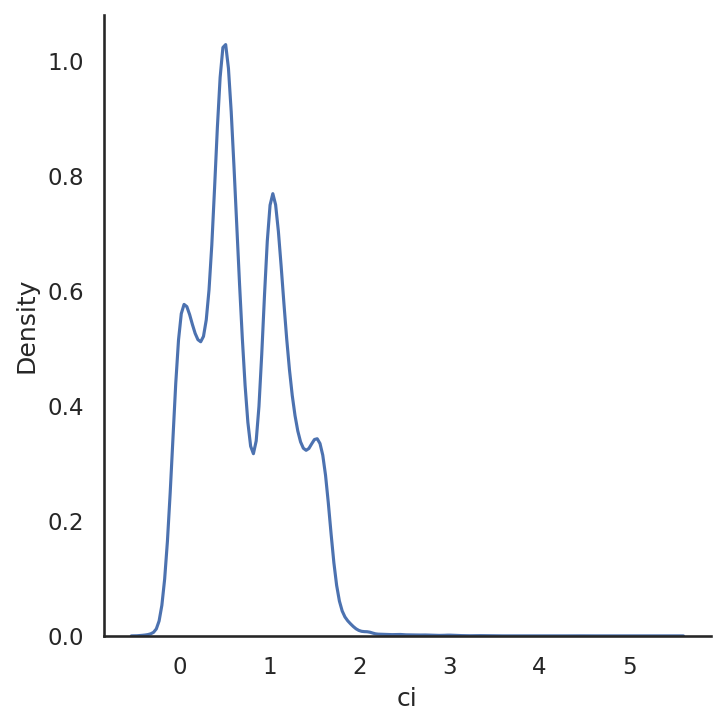

In [20]:
sns.displot(data=df, x="ci", kind="kde")

<AxesSubplot:xlabel='ci', ylabel='absmag'>

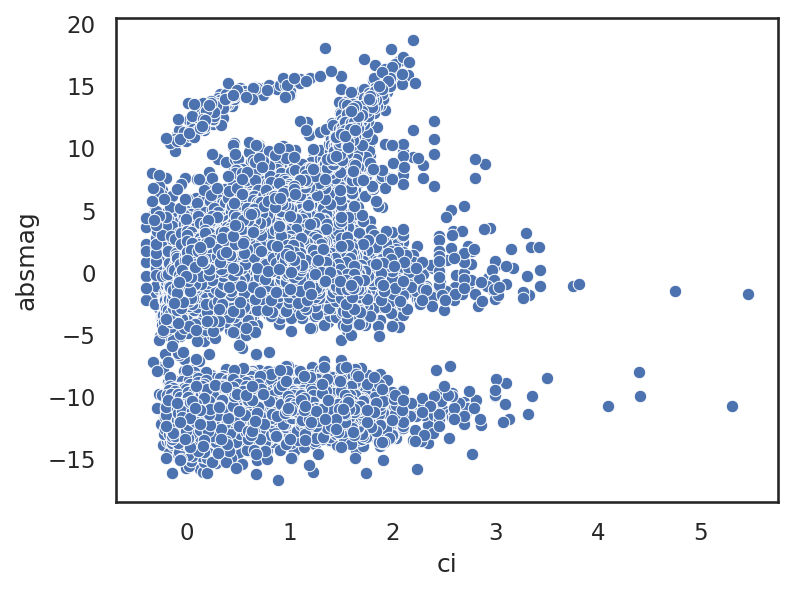

In [21]:
sns.scatterplot(data=df, x="ci", y="absmag")

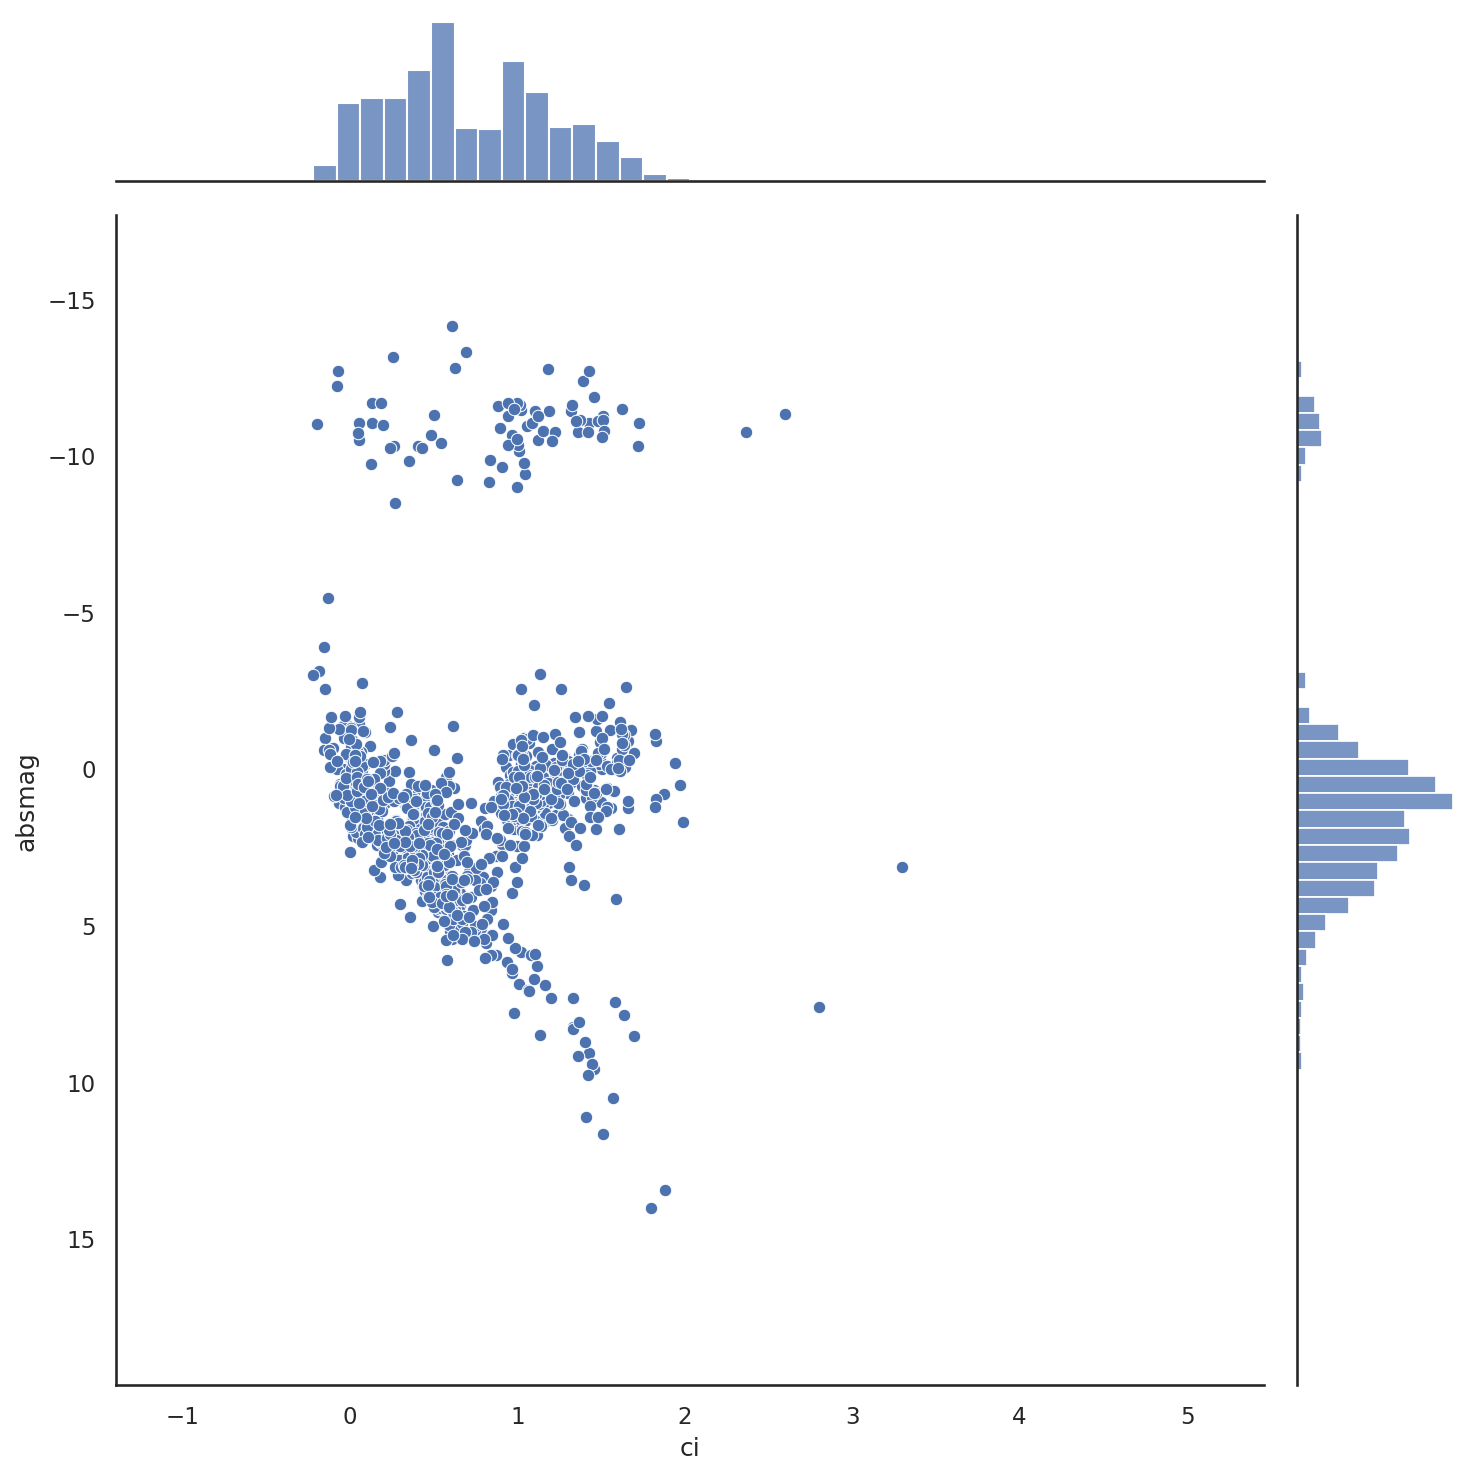

In [22]:
xlim = (min(df['ci']) - 1, max(df['ci']))
ylim = (max(df['absmag']) + 1, min(df['absmag']) - 1) # inverts y-axis

ax = sns.jointplot(
    x="ci", y="absmag", data=df.sample(1000),
    xlim=xlim, ylim=ylim,
    height=10, ratio=6)

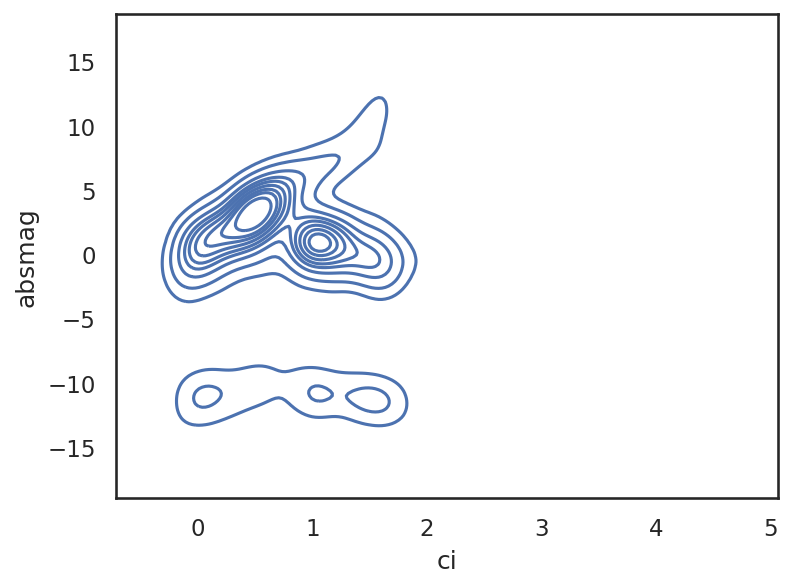

In [23]:
ax = sns.kdeplot(data=df.sample(10000),
    x="ci", 
    y="absmag")

<AxesSubplot:xlabel='bill_length_mm', ylabel='Count'>

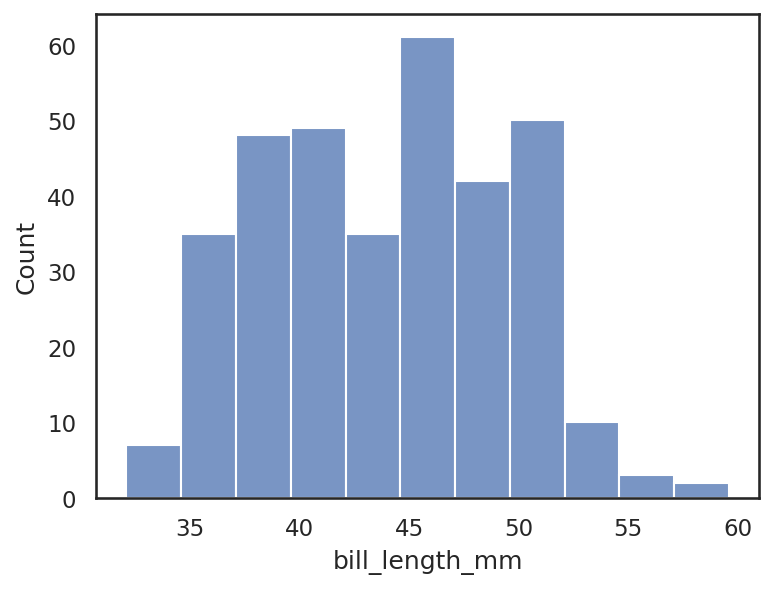

In [24]:
# when mean is not enough

sns.histplot(penguins, x="bill_length_mm") 

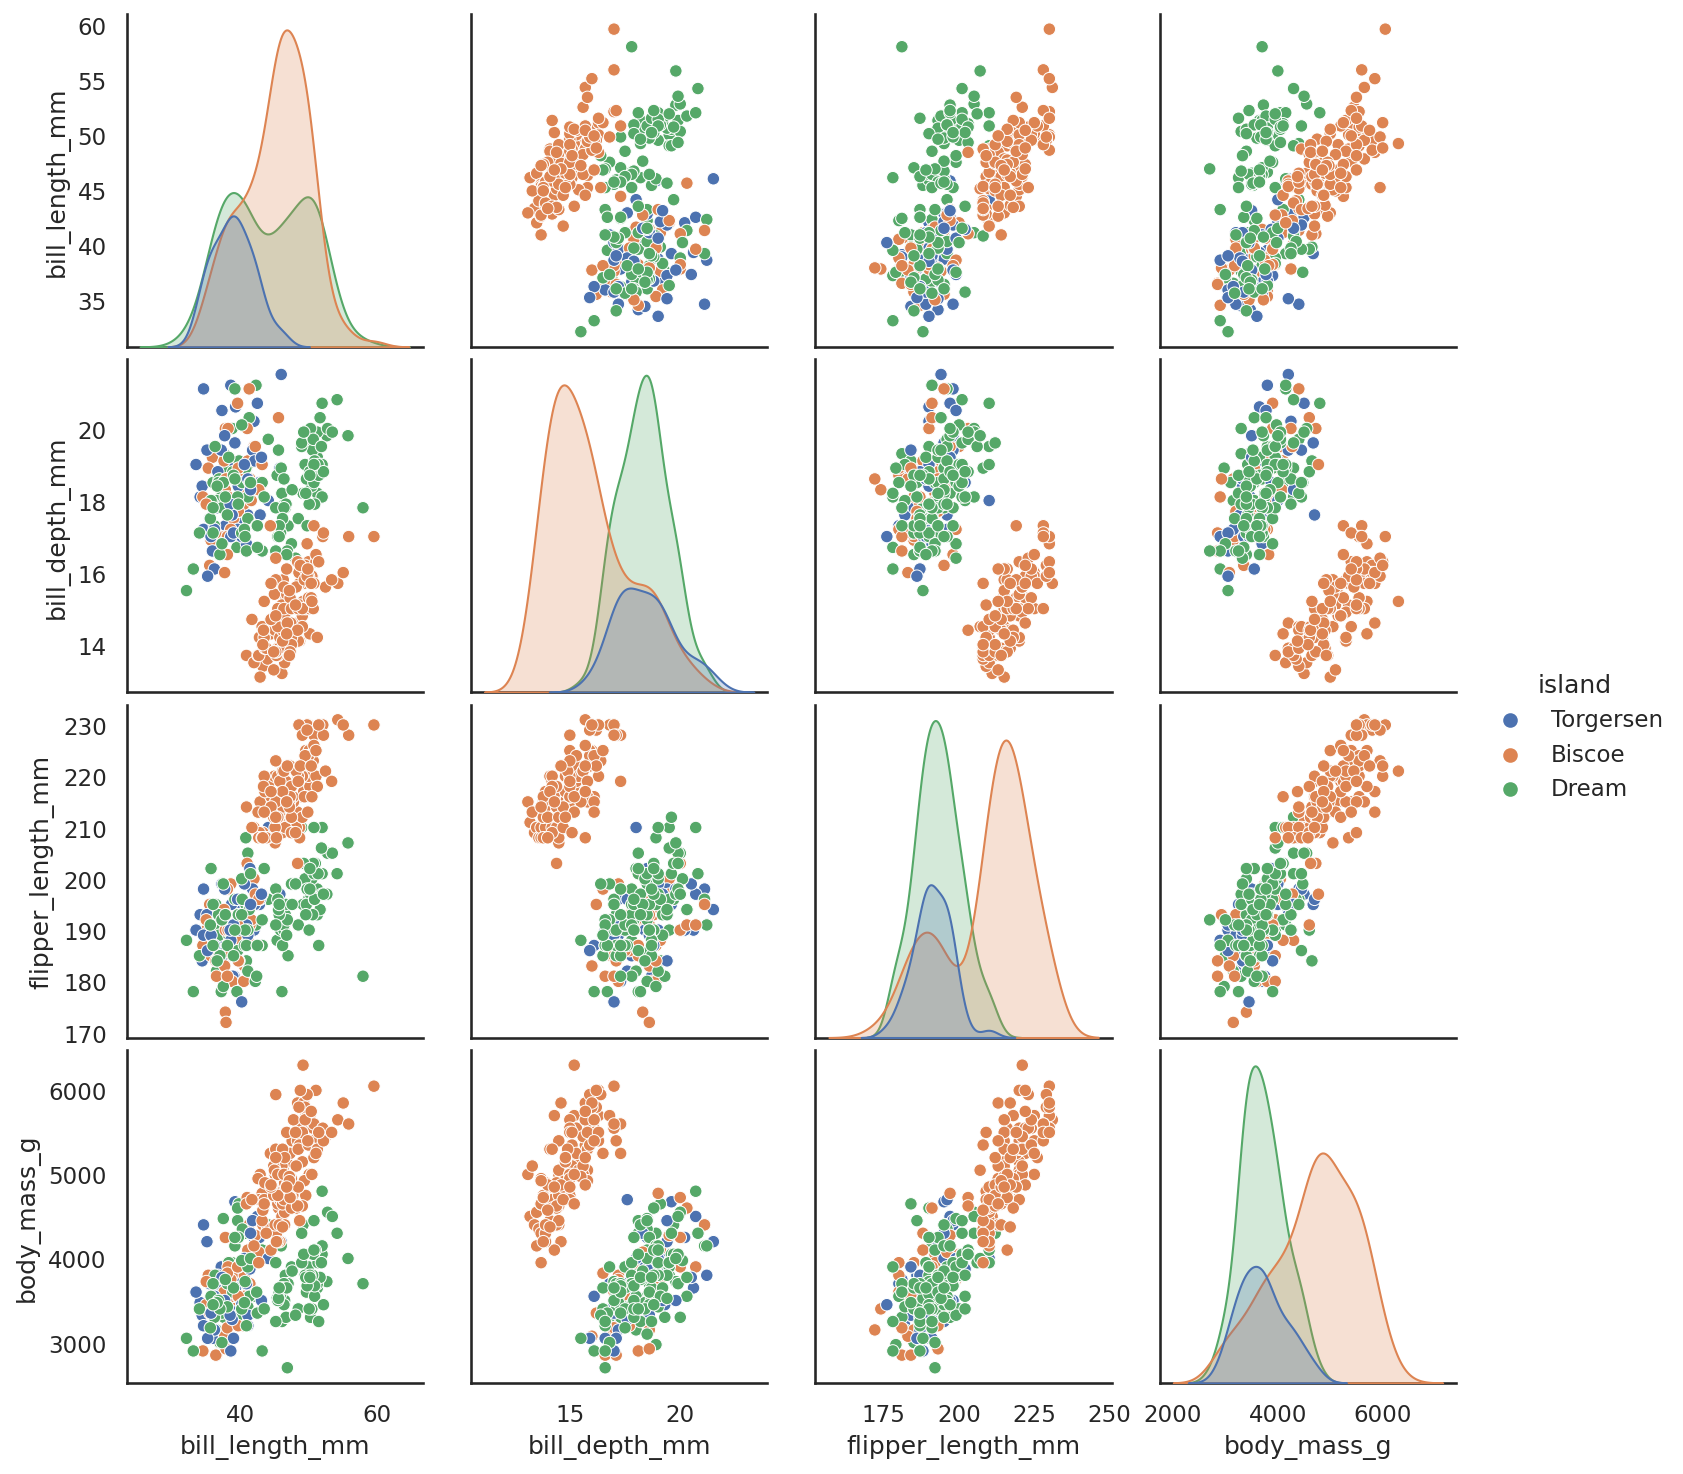

In [25]:
# this is madness

# sns.pairplot(penguins)
sns.pairplot(penguins, hue="island")

In [ ]:
sns.scatterplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", hue="species")

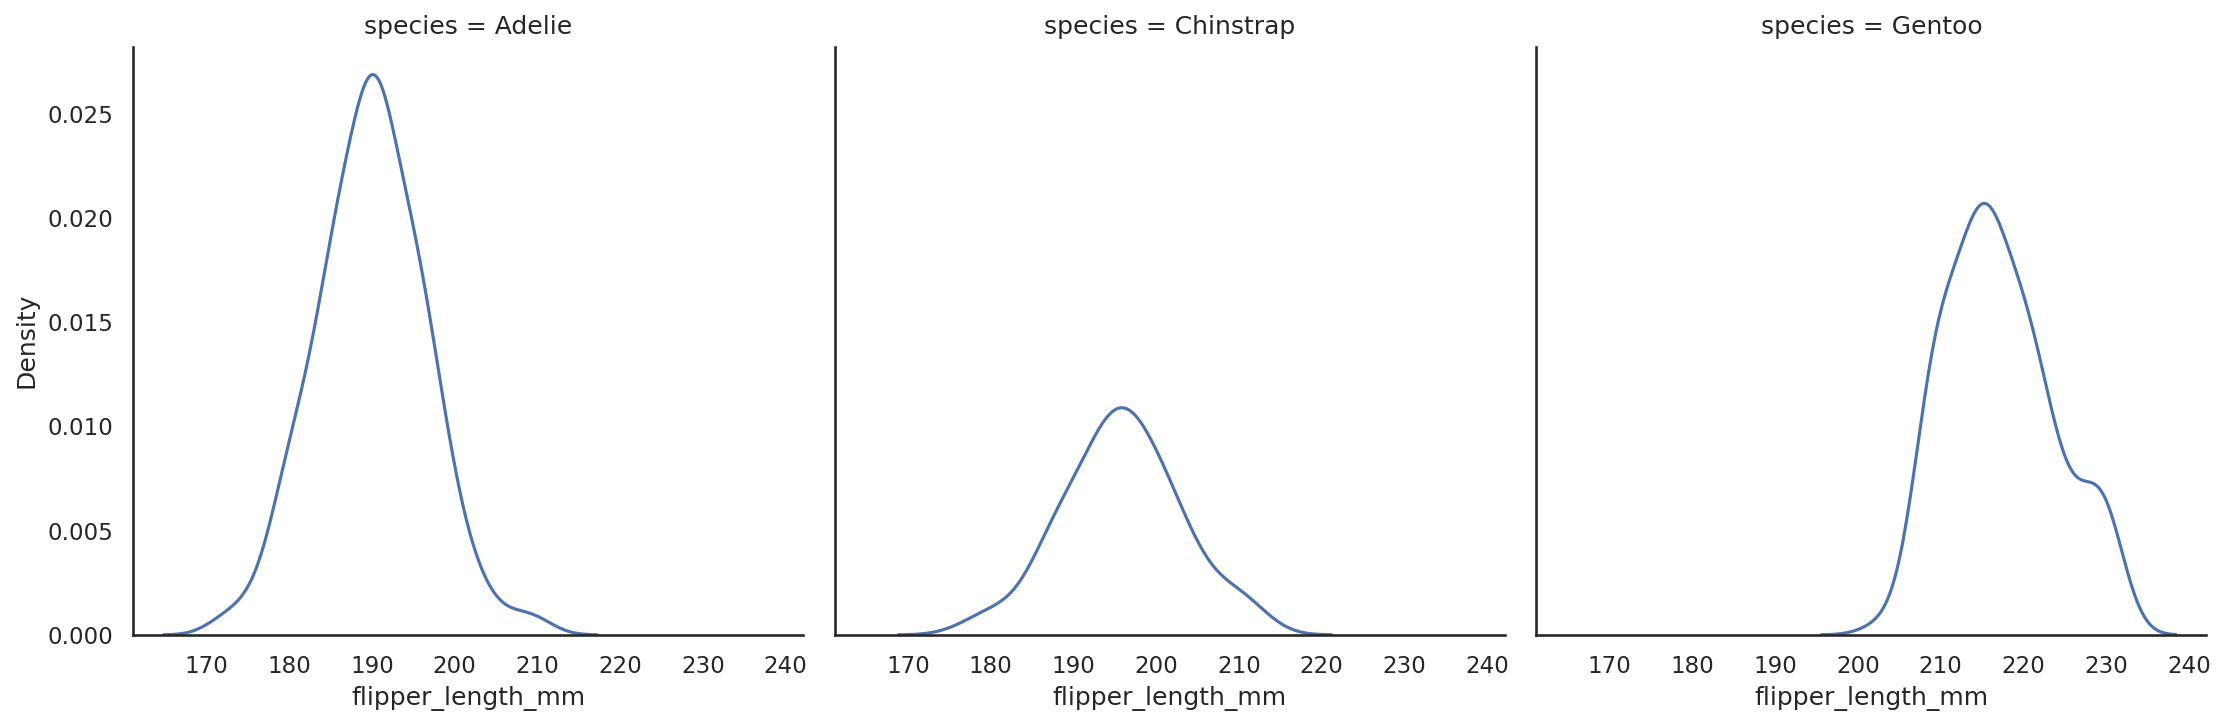

In [26]:
# data distributions: what is a typical flipper length?
penguins.flipper_length_mm.mean()

sns.displot(data=penguins, x="flipper_length_mm", col="species", kind="kde")


(-1.0, 2.0)

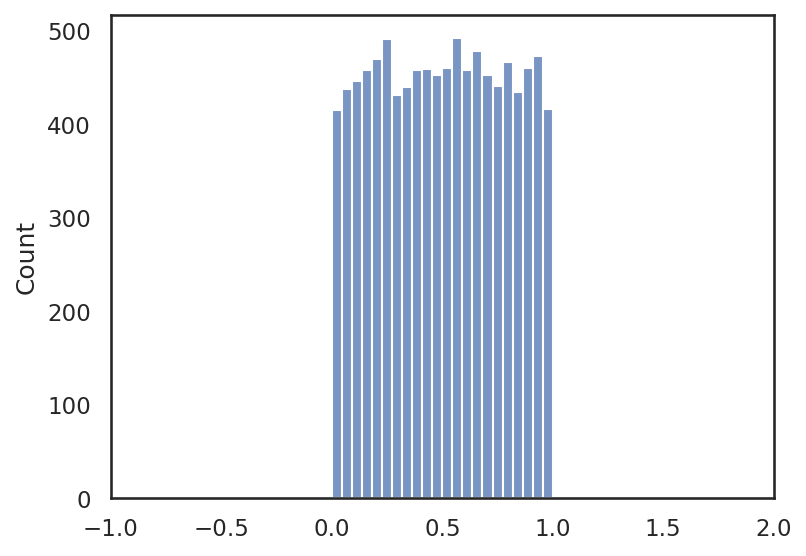

In [27]:
import numpy as np
sns.histplot(np.random.rand(10000))
plt.xlim([-1, 2])

In [28]:
plt.hist?

Signature:
plt.hist(
    x,
    bins=None,
    range=None,
    density=False,
    weights=None,
    cumulative=False,
    bottom=None,
    histtype='bar',
    align='mid',
    orientation='vertical',
    rwidth=None,
    log=False,
    color=None,
    label=None,
    stacked=False,
    *,
    data=None,
    **kwargs,
)
Docstring:
Plot a histogram.

Compute and draw the histogram of *x*.  The return value is a tuple
(*n*, *bins*, *patches*) or ([*n0*, *n1*, ...], *bins*, [*patches0*,
*patches1*, ...]) if the input contains multiple data.  See the
documentation of the *weights* parameter to draw a histogram of
already-binned data.

Multiple data can be provided via *x* as a list of datasets
of potentially different length ([*x0*, *x1*, ...]), or as
a 2D ndarray in which each column is a dataset.  Note that
the ndarray form is transposed relative to the list form.

Masked arrays are not supported.

The *bins*, *range*, *weights*, and *density* parameters behave as in
`numpy.histogram`.

P

False

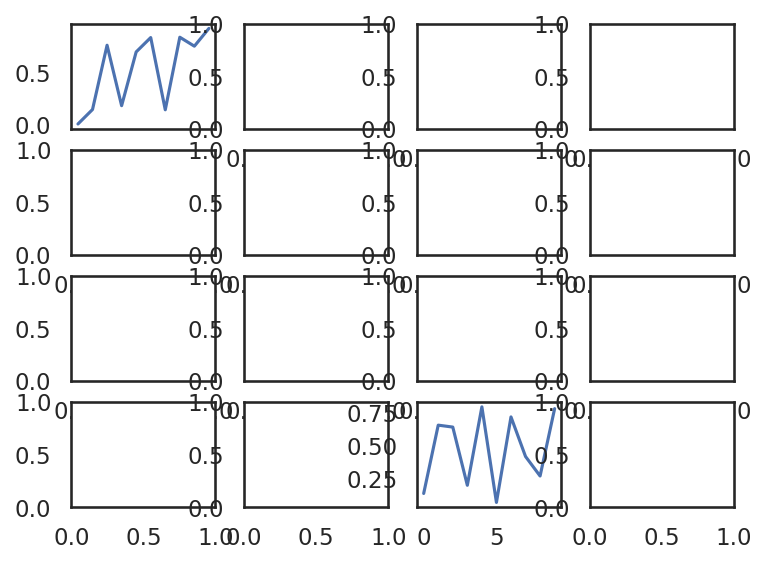

In [29]:
import numpy as np

fig,axs = plt.subplots(4, 4)

axs[0, 0].plot(np.random.rand(10))
axs[3, 2].plot(np.random.rand(10))

plt.gca() is axs[2, 3]